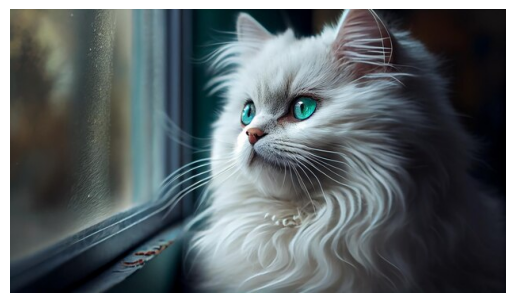

Persian cat


In [2]:
from transformers import ConvNextImageProcessor, ConvNextForImageClassification
import torch
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt

# URL of the image
image_url = "https://img.freepik.com/free-photo/cute-domestic-kitten-sits-window-staring-outside-generative-ai_188544-12519.jpg?size=626&ext=jpg&ga=GA1.1.2008272138.1721606400&semt=ais_user"

# Download the image
response = requests.get(image_url)
image = Image.open(BytesIO(response.content))

# Display the image
plt.imshow(image)
plt.axis('off')  # Hide the axes
plt.show()

# Load the processor and model
processor = ConvNextImageProcessor.from_pretrained("facebook/convnext-small-224")
model = ConvNextForImageClassification.from_pretrained("facebook/convnext-small-224")

# Preprocess the image
inputs = processor(image, return_tensors="pt")

# Predict the class
with torch.no_grad():
    logits = model(**inputs).logits

# Get the predicted label
predicted_label = logits.argmax(-1).item()
print(model.config.id2label[predicted_label])

In [5]:
processor

ConvNextImageProcessor {
  "_valid_processor_keys": [
    "images",
    "do_resize",
    "size",
    "crop_pct",
    "resample",
    "do_rescale",
    "rescale_factor",
    "do_normalize",
    "image_mean",
    "image_std",
    "return_tensors",
    "data_format",
    "input_data_format"
  ],
  "crop_pct": 0.875,
  "do_normalize": true,
  "do_rescale": true,
  "do_resize": true,
  "image_mean": [
    0.485,
    0.456,
    0.406
  ],
  "image_processor_type": "ConvNextImageProcessor",
  "image_std": [
    0.229,
    0.224,
    0.225
  ],
  "resample": 3,
  "rescale_factor": 0.00392156862745098,
  "size": {
    "shortest_edge": 224
  }
}

In [6]:
model

ConvNextForImageClassification(
  (convnext): ConvNextModel(
    (embeddings): ConvNextEmbeddings(
      (patch_embeddings): Conv2d(3, 96, kernel_size=(4, 4), stride=(4, 4))
      (layernorm): ConvNextLayerNorm()
    )
    (encoder): ConvNextEncoder(
      (stages): ModuleList(
        (0): ConvNextStage(
          (downsampling_layer): Identity()
          (layers): Sequential(
            (0): ConvNextLayer(
              (dwconv): Conv2d(96, 96, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3), groups=96)
              (layernorm): ConvNextLayerNorm()
              (pwconv1): Linear(in_features=96, out_features=384, bias=True)
              (act): GELUActivation()
              (pwconv2): Linear(in_features=384, out_features=96, bias=True)
              (drop_path): Identity()
            )
            (1): ConvNextLayer(
              (dwconv): Conv2d(96, 96, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3), groups=96)
              (layernorm): ConvNextLayerNorm()
              

In [ ]:
processor = ConvNextImageProcessor(
    do_resize=True,
    size={"shortest_edge": 416},
    do_normalize=True,
    image_mean=[0.485, 0.456, 0.406],
    image_std=[0.229, 0.224, 0.225]
)

In [7]:
inputs

{'pixel_values': tensor([[[[-0.0629, -0.1999, -0.3198,  ..., -0.2513, -0.7137, -0.8849],
          [-0.0801, -0.2171, -0.3198,  ..., -0.4054, -0.4739, -0.8678],
          [-0.0801, -0.2342, -0.3369,  ..., -0.7308, -0.4568, -1.0562],
          ...,
          [-1.7069, -2.0494, -1.9467,  ..., -1.0390, -1.0219, -1.1075],
          [-2.1179, -2.0152, -1.9295,  ..., -1.1075, -1.0562, -1.0048],
          [-1.9809, -1.9809, -1.9295,  ..., -1.1589, -1.1760, -1.1075]],

         [[ 0.5203,  0.5203,  0.4678,  ..., -0.3200, -0.8452, -1.0728],
          [ 0.4853,  0.5028,  0.4678,  ..., -0.4776, -0.6001, -1.0378],
          [ 0.4853,  0.4853,  0.4678,  ..., -0.8102, -0.5826, -1.2304],
          ...,
          [-1.3354, -1.7381, -1.6681,  ..., -0.9503, -0.9328, -1.0203],
          [-1.7906, -1.6856, -1.5630,  ..., -1.0203, -0.9678, -0.9153],
          [-1.6506, -1.5805, -1.4755,  ..., -1.0728, -1.0903, -1.0203]],

         [[ 0.7402,  0.7751,  0.7576,  ..., -0.0441, -0.5670, -0.8110],
          [ 0

In [9]:
inputs.pixel_values.shape

torch.Size([1, 3, 224, 224])

In [12]:
import inspect

In [14]:
print(inspect.getsource(model.forward))

    @add_start_docstrings_to_model_forward(CONVNEXT_INPUTS_DOCSTRING)
    @add_code_sample_docstrings(
        checkpoint=_IMAGE_CLASS_CHECKPOINT,
        output_type=ImageClassifierOutputWithNoAttention,
        config_class=_CONFIG_FOR_DOC,
        expected_output=_IMAGE_CLASS_EXPECTED_OUTPUT,
    )
    def forward(
        self,
        pixel_values: torch.FloatTensor = None,
        labels: Optional[torch.LongTensor] = None,
        output_hidden_states: Optional[bool] = None,
        return_dict: Optional[bool] = None,
    ) -> Union[Tuple, ImageClassifierOutputWithNoAttention]:
        r"""
        labels (`torch.LongTensor` of shape `(batch_size,)`, *optional*):
            Labels for computing the image classification/regression loss. Indices should be in `[0, ...,
            config.num_labels - 1]`. If `config.num_labels == 1` a regression loss is computed (Mean-Square loss), If
            `config.num_labels > 1` a classification loss is computed (Cross-Entropy).
        """

In [30]:
from transformers import ConvNextImageProcessor, ConvNextModel
import torch

processor = ConvNextImageProcessor.from_pretrained("facebook/convnext-small-224")
model = ConvNextModel.from_pretrained("facebook/convnext-small-224")

inputs = processor(image, return_tensors="pt")

with torch.no_grad():
    output = model(**inputs)
    
print(output.keys())

odict_keys(['last_hidden_state', 'pooler_output'])


In [19]:
inputs.pixel_values.shape

torch.Size([1, 3, 224, 224])

In [20]:
import torch

In [23]:
fake_pixel_values = torch.rand(1, 3, 416, 416)

In [24]:
fake_pixel_values.shape

torch.Size([1, 3, 416, 416])

In [31]:
with torch.no_grad():
    output = model(fake_pixel_values)

In [33]:
output.last_hidden_state.shape

torch.Size([1, 768, 13, 13])

In [28]:
output.pooler_output.shape

torch.Size([1, 768])